In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
import pandas as pd
import numpy as np

# Read CSV

In [3]:
df=pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Cheaking Data shape
df.shape

(550068, 12)

In [5]:
#Cheaking Null Values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
#Cheaking the null values
df['Product_Category_1'].isnull().sum()

0

In [8]:
#Cheaking null values
df['Product_Category_2'].isnull().sum()

173638

**Age**

In [9]:
#Cheaking Uniques Values
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['Age']=df['Age'].str.replace('+',' ').astype(str)

**Stay_In_Current_City_Years**

In [11]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [12]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('+','').astype(str)

In [13]:
#Rename columns
df.rename(columns={'Stay_In_Current_City_Years':'City_Year','Product_Category_1':'Product_1','Product_Category_2':'Product_2','Product_Category_3':'Product_3'},inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,City_Year,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55,16,C,4+,0,8,NaN,NaN,7969


In [14]:
p1=df.groupby(['Gender','Age','Occupation'])['Product_2'].agg(['mean'])
p1['mean'].mean()

10.047898672861924

In [15]:
#fill the missing Values
df['Product_2']=df['Product_2'].fillna(10.04).astype('float64')

In [16]:
p2=df.groupby(['Gender','Age','Occupation'])['Product_3'].agg(['mean'])
p2['mean'].mean()

12.712938288199613

In [17]:
#fill missing values
df['Product_3']=df['Product_3'].fillna(12.71).astype('float64')

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,City_Year,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,10.04,12.71,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.00,14.00,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,10.04,12.71,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.00,12.71,1057
4,1000002,P00285442,M,55,16,C,4+,0,8,10.04,12.71,7969


# Data Visualisation

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,City_Year,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,10.04,12.71,8370


**Visualize Indivisual Columns**

<Axes: xlabel='Gender', ylabel='count'>

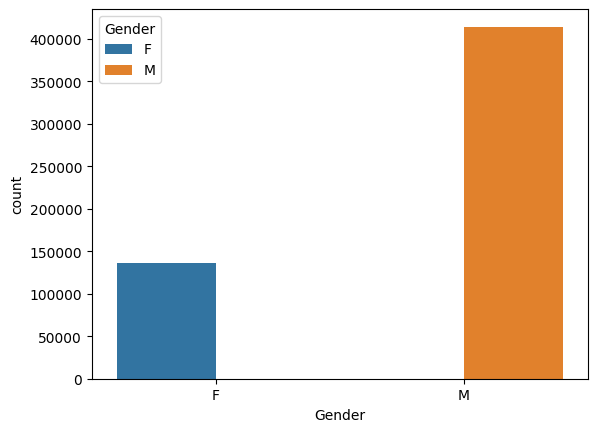

In [21]:
sns.countplot(x='Gender',data=df,hue='Gender')

1. So this plot more then 40000 Male Customers and females customers are between 100000 to 150000

<Axes: xlabel='Age', ylabel='count'>

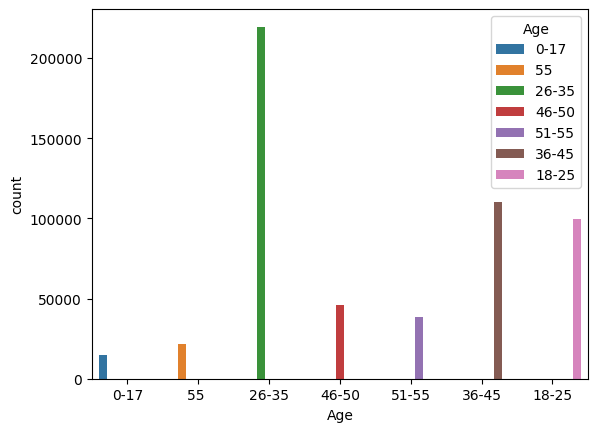

In [22]:
#Age
sns.countplot(x='Age',data=df,hue='Age')

* Here in this plot more customers between 26-35 age.

<Axes: xlabel='Occupation', ylabel='count'>

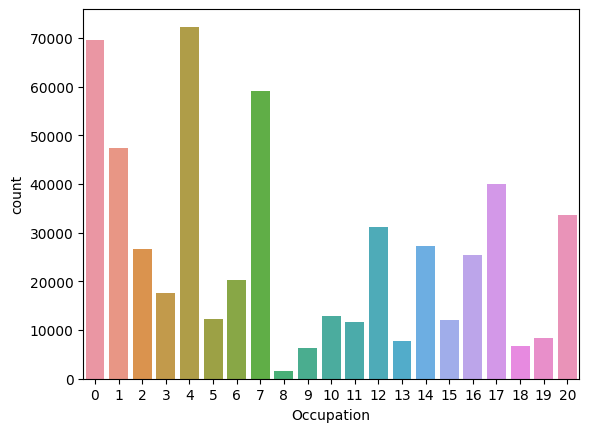

In [23]:
sns.countplot(x='Occupation',data=df)

* In this plot 0 , 4 & 7 is high count.

<Axes: xlabel='City_Category', ylabel='count'>

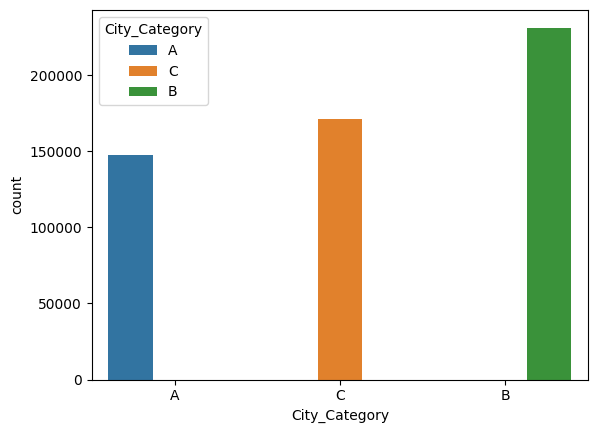

In [24]:
#City_Category
sns.countplot(x='City_Category',data=df,hue='City_Category')

* Here city B counted more then city A & B.

<Axes: xlabel='City_Year', ylabel='count'>

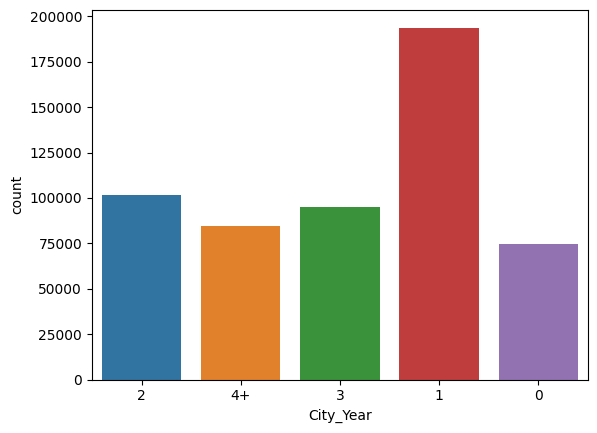

In [25]:
#City_Year
sns.countplot(x='City_Year',data=df)

* Here these plot counted City_Year-1 is more than another cityes

<Axes: xlabel='Marital_Status', ylabel='count'>

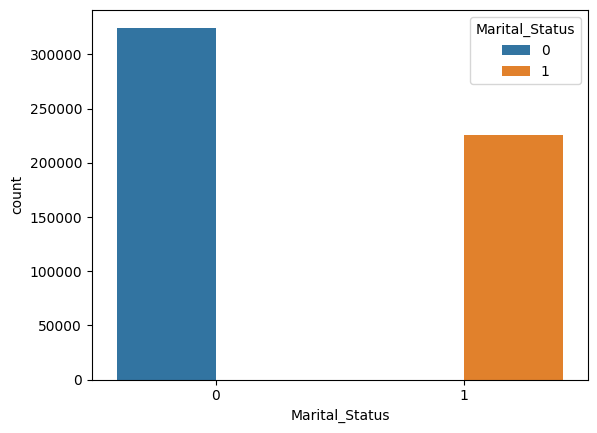

In [26]:
#Marital_Status
sns.countplot(x='Marital_Status',data=df,hue='Marital_Status')

* Here these plot counting Marital_Status-1 more then Marital_Status-0

<Axes: xlabel='Product_1', ylabel='count'>

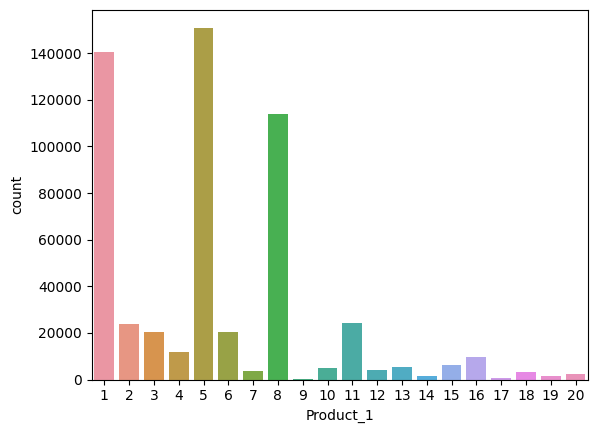

In [27]:
#Product_1
sns.countplot(x='Product_1',data=df)

<Axes: xlabel='Product_2', ylabel='count'>

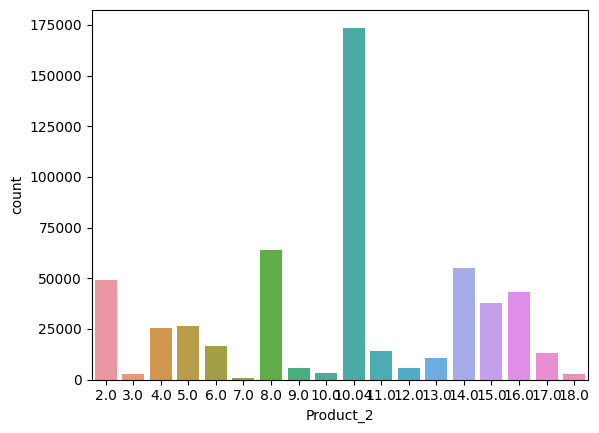

In [28]:
#Product_2
sns.countplot(x='Product_2',data=df)

<Axes: xlabel='Product_3', ylabel='count'>

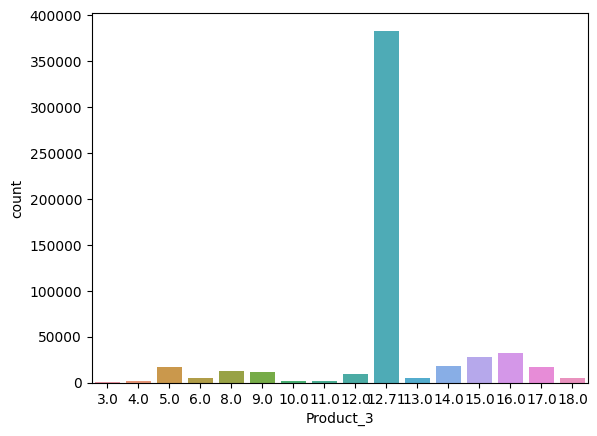

In [29]:
#Product_3
sns.countplot(x='Product_3',data=df)

**Age vs Purchased**

<Axes: title={'center': 'Age vs Purchased'}, xlabel='Age'>

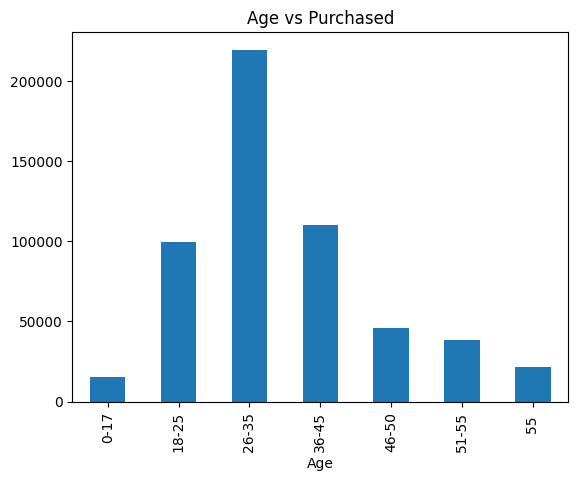

In [30]:
df.groupby(['Age'])['Purchase'].count().plot(kind='bar',title='Age vs Purchased')

**Product_1 VS Purchase**

<Axes: title={'center': 'Product_category_1 vs Purchased'}, xlabel='Product_1'>

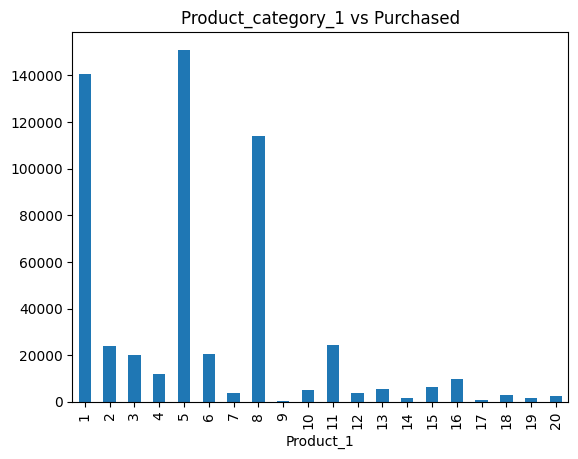

In [31]:
df.groupby(['Product_1'])['Purchase'].count().plot(kind="bar",title='Product_category_1 vs Purchased')

**Product_2 VS Purchase**

<Axes: title={'center': 'Product_2 VS Purchase'}, xlabel='Product_2'>

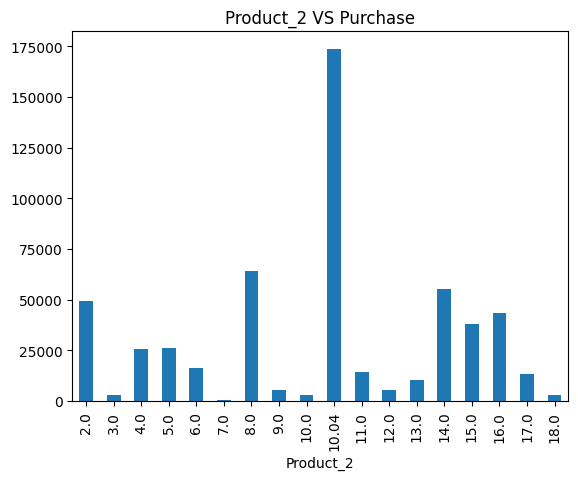

In [32]:
df.groupby(['Product_2'])['Purchase'].count().plot(kind='bar',title='Product_2 VS Purchase')

**Product_3 VS Purchase**

<Axes: title={'center': 'Product_3 VS Purchase'}, xlabel='Product_3'>

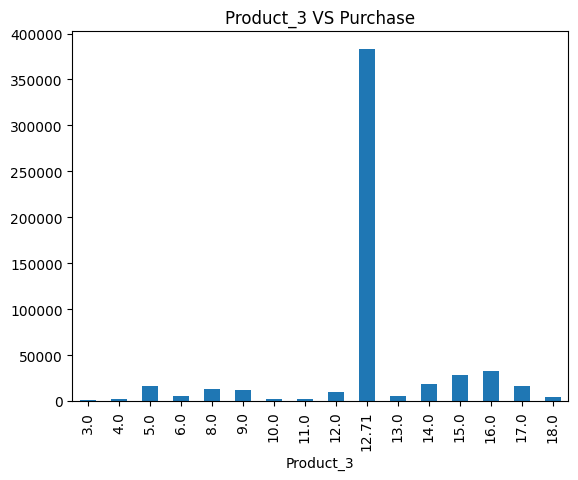

In [33]:
df.groupby(['Product_3'])['Purchase'].count().plot(kind='bar',title='Product_3 VS Purchase')

* By looking at Product_3 plot so many customers not purchase any item, few amount of customers bought from this category.
*So, plot for all product categories against purchase shows that Product_1 is most popular product category among all categories. Product_Category_2 is averagly popular & Product_3 is not so popular.

**City category pie chart**

<Axes: title={'center': 'City category pie chart'}, ylabel='count'>

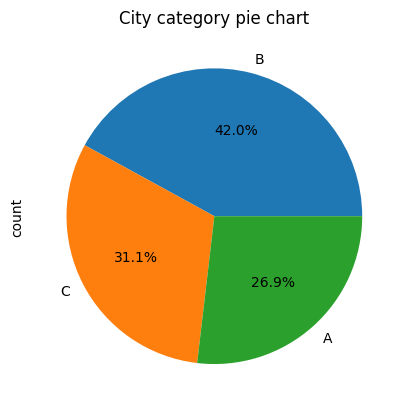

In [34]:
df['City_Category'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='City category pie chart')

* it seems City B has more Customers

**check for more possible plots**

*Purchase by City_Year*

<Axes: title={'center': 'Purchase by City_Year'}, xlabel='City_Year'>

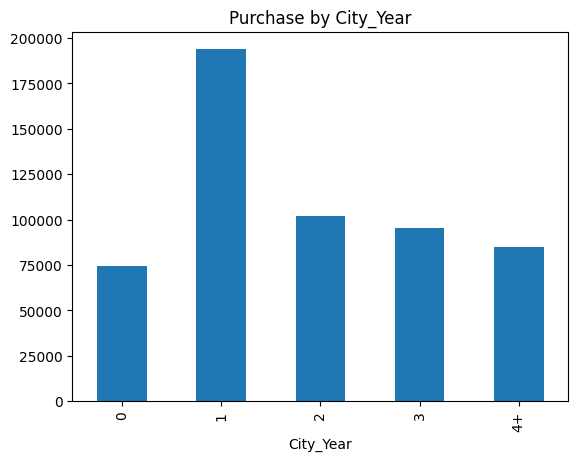

In [35]:
df.groupby('City_Year')['Purchase'].count().plot(kind='bar',title='Purchase by City_Year')

*Purchase by Age*

<Axes: title={'center': 'Purchase by Age'}, xlabel='Age'>

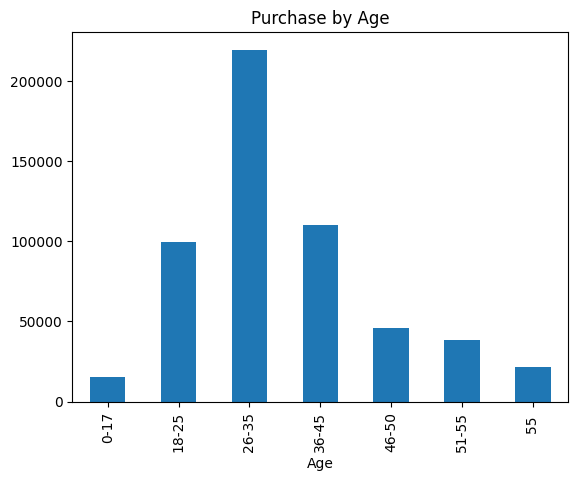

In [36]:
df.groupby('Age')['Purchase'].count().plot(kind='bar',title='Purchase by Age')